In [1]:
!nvidia-smi

Sun Oct 18 20:35:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.71       Driver Version: 456.71       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   59C    P2    57W / 300W |   2569MiB / 11264MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [ ]:
!git clone https://github.com/KillerStrike17/PyDeNN.git

In [ ]:
%cd PyDeNN/

In [2]:
from DeNN.model import resnet
from DeNN.dataset_loader import data_loader, data_augmentation
from DeNN.trainer import trainer
from DeNN.visualization import * 
from DeNN.util import *


In [3]:
import torch,torchvision
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms.functional import normalize, resize, to_tensor, to_pil_image
from torch.optim.lr_scheduler import ReduceLROnPlateau,OneCycleLR

In [4]:
DATA_PATH = 'data/'
BATCH_SIZE =128

In [5]:
my_transformations = data_augmentation.TinyImageNetAlbumentations()
train, test = data_loader.DatasetTinyImageNet(data_path = DATA_PATH,transformations = my_transformations,batch_size = BATCH_SIZE).load_data()

Extracting data/tiny-imagenet-200.zip to data/



In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = resnet.ResNet18(num_classes=1000).to(device)
summary(model,input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.27E-02


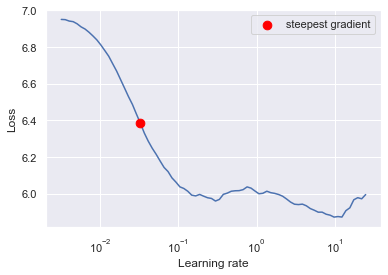

In [8]:
lr_finder = LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(train, end_lr=100, num_iter=100)
my_plt,lr_val = lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [9]:
max_lr = lr_val
min_lr = max_lr/10
max_lr,min_lr

(0.03274549162877729, 0.003274549162877729)

In [10]:
scheduler = OneCycleLR(optimizer,max_lr=max_lr,steps_per_epoch=len(train),epochs = 50,pct_start=8/50)

In [11]:
trainer = trainer.Trainer( model =model , optimizer =optimizer , device =device , train_loader = train, test_loader = test,epochs = 50,criteria = criterion,scheduler = scheduler)

In [12]:
(w,x),(y,z) = trainer.train()

  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

Epoch: 1


loss=4.503812313079834 batch_id=781 Accuracy = 0.07391: 100%|████████████████████████| 782/782 [06:57<00:00,  1.87it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 1060/10000 (10.60%)

Epoch: 2


loss=3.5393335819244385 batch_id=781 Accuracy = 0.16172: 100%|███████████████████████| 782/782 [06:43<00:00,  1.94it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 1780/10000 (17.80%)

Epoch: 3


loss=3.3480353355407715 batch_id=781 Accuracy = 0.22367: 100%|███████████████████████| 782/782 [03:08<00:00,  4.14it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 2456/10000 (24.56%)

Epoch: 4


loss=2.8070716857910156 batch_id=781 Accuracy = 0.27568: 100%|███████████████████████| 782/782 [03:12<00:00,  4.05it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0243, Accuracy: 2833/10000 (28.33%)

Epoch: 5


loss=2.5746285915374756 batch_id=781 Accuracy = 0.32096: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 3211/10000 (32.11%)

Epoch: 6


loss=2.854536771774292 batch_id=781 Accuracy = 0.35589: 100%|████████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 3448/10000 (34.48%)

Epoch: 7


loss=2.5764639377593994 batch_id=781 Accuracy = 0.38587: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 3552/10000 (35.52%)

Epoch: 8


loss=2.3704638481140137 batch_id=781 Accuracy = 0.41376: 100%|███████████████████████| 782/782 [03:09<00:00,  4.13it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 4088/10000 (40.88%)

Epoch: 9


loss=2.3265297412872314 batch_id=781 Accuracy = 0.43579: 100%|███████████████████████| 782/782 [03:13<00:00,  4.04it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 4201/10000 (42.01%)

Epoch: 10


loss=2.8923215866088867 batch_id=781 Accuracy = 0.45999: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0193, Accuracy: 4158/10000 (41.58%)

Epoch: 11


loss=2.528550386428833 batch_id=781 Accuracy = 0.47602: 100%|████████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0180, Accuracy: 4446/10000 (44.46%)

Epoch: 12


loss=1.8013243675231934 batch_id=781 Accuracy = 0.49706: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0184, Accuracy: 4373/10000 (43.73%)

Epoch: 13


loss=2.341175079345703 batch_id=781 Accuracy = 0.51278: 100%|████████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0178, Accuracy: 4554/10000 (45.54%)

Epoch: 14


loss=2.4400439262390137 batch_id=781 Accuracy = 0.52994: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 4690/10000 (46.90%)

Epoch: 15


loss=2.487349271774292 batch_id=781 Accuracy = 0.54604: 100%|████████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 4896/10000 (48.96%)

Epoch: 16


loss=1.8683186769485474 batch_id=781 Accuracy = 0.5591: 100%|████████████████████████| 782/782 [04:16<00:00,  3.05it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 4891/10000 (48.91%)

Epoch: 17


loss=1.8066365718841553 batch_id=781 Accuracy = 0.5748: 100%|████████████████████████| 782/782 [03:24<00:00,  3.82it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 4949/10000 (49.49%)

Epoch: 18


loss=1.7160812616348267 batch_id=781 Accuracy = 0.58656: 100%|███████████████████████| 782/782 [03:08<00:00,  4.15it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 5050/10000 (50.50%)

Epoch: 19


loss=1.1565210819244385 batch_id=781 Accuracy = 0.59867: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 5023/10000 (50.23%)

Epoch: 20


loss=1.8070178031921387 batch_id=781 Accuracy = 0.6107: 100%|████████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 5101/10000 (51.01%)

Epoch: 21


loss=1.635430932044983 batch_id=781 Accuracy = 0.62221: 100%|████████████████████████| 782/782 [03:09<00:00,  4.13it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 5254/10000 (52.54%)

Epoch: 22


loss=1.2326079607009888 batch_id=781 Accuracy = 0.63331: 100%|███████████████████████| 782/782 [03:12<00:00,  4.06it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 5181/10000 (51.81%)

Epoch: 23


loss=1.3163564205169678 batch_id=781 Accuracy = 0.64646: 100%|███████████████████████| 782/782 [03:10<00:00,  4.11it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0160, Accuracy: 5146/10000 (51.46%)

Epoch: 24


loss=1.4863618612289429 batch_id=781 Accuracy = 0.65595: 100%|███████████████████████| 782/782 [03:11<00:00,  4.08it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 5268/10000 (52.68%)

Epoch: 25


loss=1.6283283233642578 batch_id=781 Accuracy = 0.66986: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 5218/10000 (52.18%)

Epoch: 26


loss=2.0583655834198 batch_id=781 Accuracy = 0.67806: 100%|██████████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 5321/10000 (53.21%)

Epoch: 27


loss=1.2273023128509521 batch_id=781 Accuracy = 0.68941: 100%|███████████████████████| 782/782 [03:11<00:00,  4.09it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 5293/10000 (52.93%)

Epoch: 28


loss=0.8876959085464478 batch_id=781 Accuracy = 0.70181: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0153, Accuracy: 5458/10000 (54.58%)

Epoch: 29


loss=1.6647539138793945 batch_id=781 Accuracy = 0.71194: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0155, Accuracy: 5463/10000 (54.63%)

Epoch: 30


loss=1.5907684564590454 batch_id=781 Accuracy = 0.72063: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 5316/10000 (53.16%)

Epoch: 31


loss=1.5381795167922974 batch_id=781 Accuracy = 0.73: 100%|██████████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0154, Accuracy: 5457/10000 (54.57%)

Epoch: 32


loss=0.9506127238273621 batch_id=781 Accuracy = 0.74306: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 5431/10000 (54.31%)

Epoch: 33


loss=0.9155674576759338 batch_id=781 Accuracy = 0.75118: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 5443/10000 (54.43%)

Epoch: 34


loss=0.7812265753746033 batch_id=781 Accuracy = 0.76017: 100%|███████████████████████| 782/782 [03:07<00:00,  4.16it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 5405/10000 (54.05%)

Epoch: 35


loss=1.214293360710144 batch_id=781 Accuracy = 0.77056: 100%|████████████████████████| 782/782 [03:29<00:00,  3.73it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 5402/10000 (54.02%)

Epoch: 36


loss=1.2110549211502075 batch_id=781 Accuracy = 0.78026: 100%|███████████████████████| 782/782 [03:11<00:00,  4.08it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 5406/10000 (54.06%)

Epoch: 37


loss=1.0077714920043945 batch_id=781 Accuracy = 0.78699: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 5508/10000 (55.08%)

Epoch: 38


loss=1.0215513706207275 batch_id=781 Accuracy = 0.79602: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 5400/10000 (54.00%)

Epoch: 39


loss=0.9757344722747803 batch_id=781 Accuracy = 0.80498: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 5465/10000 (54.65%)

Epoch: 40


loss=0.9007858037948608 batch_id=781 Accuracy = 0.81505: 100%|███████████████████████| 782/782 [03:09<00:00,  4.12it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 5582/10000 (55.82%)

Epoch: 41


loss=0.8521186709403992 batch_id=781 Accuracy = 0.82387: 100%|███████████████████████| 782/782 [03:08<00:00,  4.15it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0166, Accuracy: 5438/10000 (54.38%)

Epoch: 42


loss=0.5156740546226501 batch_id=781 Accuracy = 0.83178: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0163, Accuracy: 5483/10000 (54.83%)

Epoch: 43


loss=1.0287179946899414 batch_id=781 Accuracy = 0.84052: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0165, Accuracy: 5480/10000 (54.80%)

Epoch: 44


loss=0.6982362270355225 batch_id=781 Accuracy = 0.84562: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0167, Accuracy: 5476/10000 (54.76%)

Epoch: 45


loss=0.35407787561416626 batch_id=781 Accuracy = 0.85376: 100%|██████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 5521/10000 (55.21%)

Epoch: 46


loss=0.5969459414482117 batch_id=781 Accuracy = 0.86265: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 5472/10000 (54.72%)

Epoch: 47


loss=0.3358372747898102 batch_id=781 Accuracy = 0.86416: 100%|███████████████████████| 782/782 [03:07<00:00,  4.17it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 5575/10000 (55.75%)

Epoch: 48


loss=0.9479374885559082 batch_id=781 Accuracy = 0.87274: 100%|███████████████████████| 782/782 [03:12<00:00,  4.07it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0168, Accuracy: 5568/10000 (55.68%)

Epoch: 49


loss=0.9662744402885437 batch_id=781 Accuracy = 0.87577: 100%|███████████████████████| 782/782 [03:10<00:00,  4.11it/s]
  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0170, Accuracy: 5494/10000 (54.94%)

Epoch: 50


loss=1.018648624420166 batch_id=781 Accuracy = 0.88585: 100%|████████████████████████| 782/782 [03:10<00:00,  4.12it/s]



Test set: Average loss: 0.0176, Accuracy: 5529/10000 (55.29%)

